In [1]:
## first line of code is to clear R's memory
rm(list=ls())

In [436]:
library(Signac)
library(Seurat)
library(rtracklayer)
library(EnsDb.Hsapiens.v75)
library(ggplot2)
library(readr)
library(qs)
library(dplyr)
library(stringr)
library(Azimuth)
library(harmony)
library(BSgenome.Hsapiens.UCSC.hg38)
library(JASPAR2020)
library(TFBSTools)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: 'Biostrings'


The following object is masked from 'package:base':

    strsplit




In [3]:
#####################################
#Cluster and cell types
#####################################
seurat_object <- qread("report/GSE184462_merged_1_20_Motif.rds")

In [235]:
id <- seurat_object$cell.type
id <- as.data.frame(id)

In [236]:
#Assing summariesed id's
id[id =="Adipocyte"] <- "Adipocyte"
id[id =="Alveolar Capillary Endothelial Cell"] <- "Endothelial"
id[id =="Alveolar Type 2 (AT2) Cell"] <- "Alveolar"
id[id =="Alverolar Type 2,Immune"] <- "Alveolar"
id[id =="Cardiac Fibroblasts"] <- "Fibroblast"
id[id =="Cardiac Pericyte 1"] <- "Pericyte"
id[id =="Cardiac Pericyte 2"] <- "Pericyte"
id[id =="Cardiac Pericyte 3"] <- "Pericyte"
id[id =="Cardiac Pericyte 4"] <- "Pericyte"
id[id =="Chief Cell"] <- "Chief Cell"
id[id =="CNS,Enteric Neuron"] <- "Neuron"
id[id =="Cortical Epithelial-like"] <- "Epithelial"
id[id =="Ductal Cell (Pancreatic)"] <- "Ductal Cell"
id[id =="Endocardial Cell"] <- "Endocardial"
id[id =="Endothelial (Exocrine Tissues)"] <- "Endothelial"
id[id =="Endothelial Cell (General) 1"] <- "Endothelial"
id[id =="Endothelial Cell (General) 2"] <- "Endothelial"
id[id =="Endothelial Cell (General) 3"] <- "Endothelial"
id[id =="Endothelial Cell (Myocardial)"] <- "Endothelial"
id[id =="Fibroblast (Epithelial)"] <- "Fibroblast"
id[id =="Fibroblast (General)"] <- "Fibroblast"
id[id =="Fibroblast (Liver Adrenal)"] <- "Fibroblast"
id[id =="Fibroblast (Peripheral Nerve)"] <- "Fibroblast"
id[id =="Foveolar Cell"] <- "Foveolar Cell"
id[id =="Keratinocyte 1"] <- "Keratinocyte"
id[id =="Luteal Cell (Ovarian)"] <- "Luteal Cell"
id[id =="Lymphatic Endothelial Cell"] <- "Endothelial"
id[id =="Macrophage (General,Alveolar)"] <- "Macrophage"
id[id =="Macrophage (General)"] <- "Macrophage"
id[id =="Mast Cell"] <- "Mast Cell"
id[id =="Memory B Cell"] <- "B"
id[id =="Mesothelial Cell"] <- "Mesothelial"
id[id =="Naive T cell"] <- "T"
id[id =="Natural Killer T Cell"] <- "T"
id[id =="Pancreatic Acinar Cell"] <- "Acinar Cell"
id[id =="Pericyte (Esophageal Muscularis)"] <- "Pericyte"
id[id =="Pericyte (General) 1"] <- "Pericyte"
id[id =="Pericyte (General) 2"] <- "Pericyte"
id[id =="Pericyte (General) 3"] <- "Pericyte"
id[id =="Pericyte (General) 4"] <- "Pericyte"
id[id =="Peripheral Nerve Stromal"] <- "Neuron"
id[id =="Plasma Cell"] <- "Plasma Cell"
id[id =="Schwann Cell (General)"] <- "Schwann Cell"
id[id =="Small Intestinal Enterocyte"] <- "Enterocyte"
id[id =="Smooth Muscle (Esophageal Muscularis) 3"] <- "Smooth Muscle"
id[id =="Smooth Muscle (GE Junction)"] <- "Smooth Muscle"
id[id =="Smooth Muscle (General)"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Vaginal)"] <- "Smooth Muscle"
id[id =="T Lymphocyte 1 (CD8+)"] <- "T"
id[id =="T lymphocyte 2 (CD4+)"] <- "T"
id[id =="Transitional Zone Cortical Cell"] <- "Cortical Cell"
id[id =="Vascular Smooth Muscle 1"] <- "Smooth Muscle"
id[id =="Vascular Smooth Muscle 2"] <- "Smooth Muscle"
id[id =="Zona Fasciculata Cortical Cell"] <- "Cortical Cell"
id[id =="Zona Glomerulosa Cortical Cell"] <- "Cortical Cell"

#Additional Cellt types (11-20)
id[id =="Airway Goblet Cell"] <- "Goblet Cell"
id[id =="Astrocyte 2"] <- "Astrocyte"
id[id =="Basal Epidermal (Skin)"] <- "Epidermal"
id[id =="Basal Epithelial (Mammary)"] <- "Epithelial"
id[id =="Blood Brain Barrier Endothelial Cell"] <- "Endothelial"
id[id =="Club Cell"] <- "Club Cell"
id[id =="Colon Epithelial Cell 1"] <- "Epithelial"
id[id =="Colon Epithelial Cell 2"] <- "Epithelial"
id[id =="Colon Epithelial Cell 3"] <- "Epithelial"
id[id =="Colonic Goblet Cell"] <- "Goblet Cell"
id[id =="Enterochromaffin Cell"] <- "Enterochromaffin Cell"
id[id =="Esophageal Epithelial Cell"] <- "Epithelial"
id[id =="Fibroblast (Gastrointestinal)"] <- "Fibroblast"
id[id =="Fibroblast (Sk Muscle Associated)"] <- "Fibroblast"
id[id =="GABAergic Neuron 1"] <- "Neuron"
id[id =="Gastric Neuroendocrine Cell"] <- "Neuron"
id[id =="Granular Epidermal (Skin)"] <- "Epidermal"
id[id =="Mammary Luminal Epithelial Cell 2"] <- "Epithelial"
id[id =="Melanocyte"] <- "Melanocyte"
id[id =="Myoepithelial (Skin)"] <- "Myoepithelial"
id[id =="Oligodendrocyte"] <- "Oligodendrocyte"
id[id =="Oligodendrocyte Precursor"] <- "Oligodendrocyte"
id[id =="Paneth Cell"] <- "Paneth Cell"
id[id =="Small Intestinal Goblet Cell"] <- "Adipocyte"
id[id =="Smooth Muscle (Colon) 1"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Colon) 2"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Esophageal Mucosal)"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Esophageal Muscularis) 1"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Esophageal Muscularis) 2"] <- "Smooth Muscle"
id[id =="Smooth Muscle (General Gastrointestinal)"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Uterine)"] <- "Smooth Muscle"
id[id =="Tuft Cell"] <- "Tuft Cell"


seurat_object$id <- id

In [63]:
#Create data frame for each summarised id and how many cells they contain
id <- unique(seurat_object$id)
df <- data.frame(row.names = id)
meta <- as.data.frame(seurat_object[[]])
for (i in id){
    temp <- filter(meta, id == i)
    df[i,1] <- length(temp$id)
    
}

colnames(df) <- c("cell_count")

#Filter for cell types (id) with more than 100 cells
filter_id = rownames(filter(df, cell_count > 100 ))
temp <- subset(seurat_object, id %in% filter_id)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



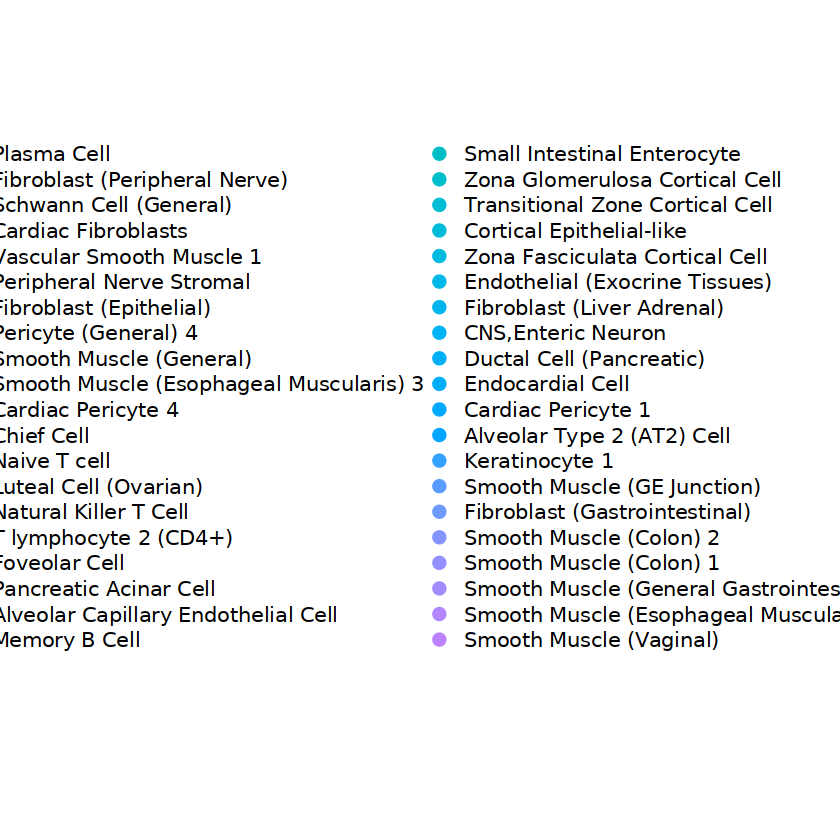

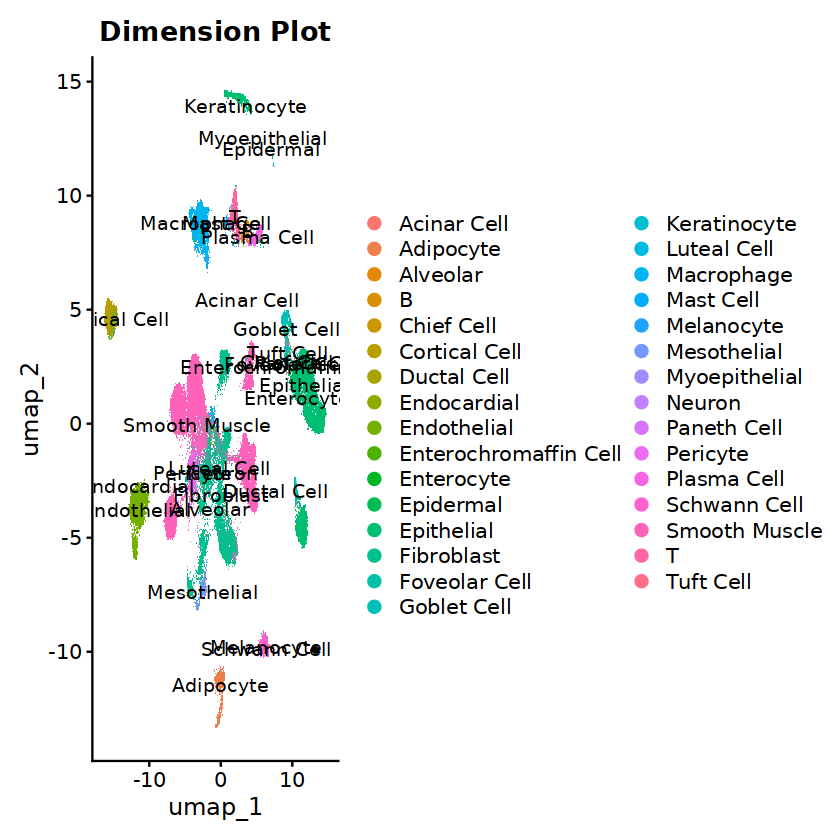

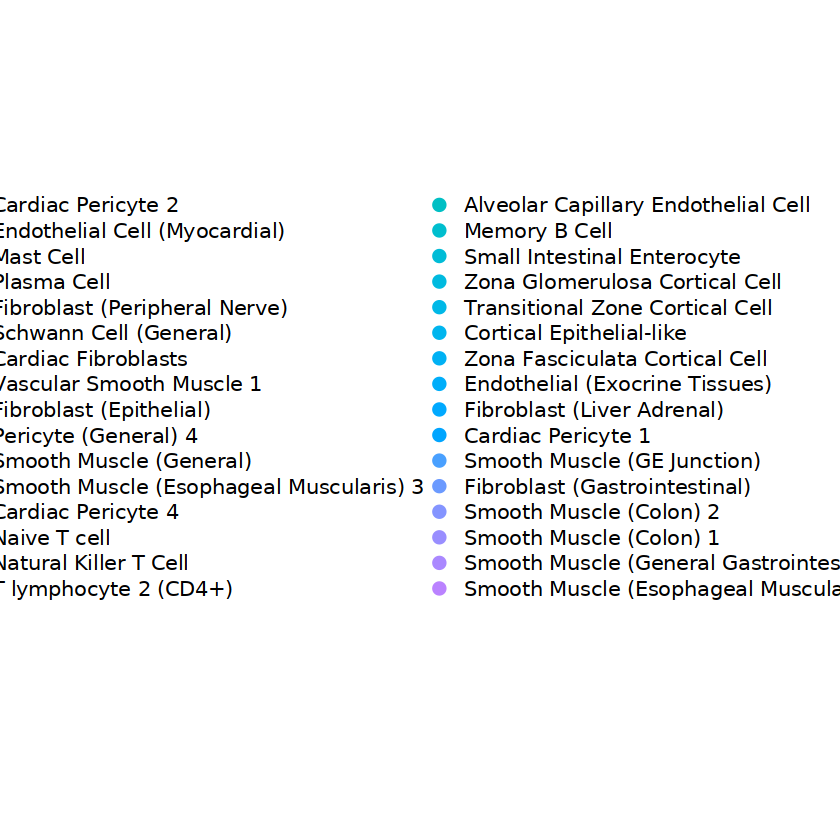

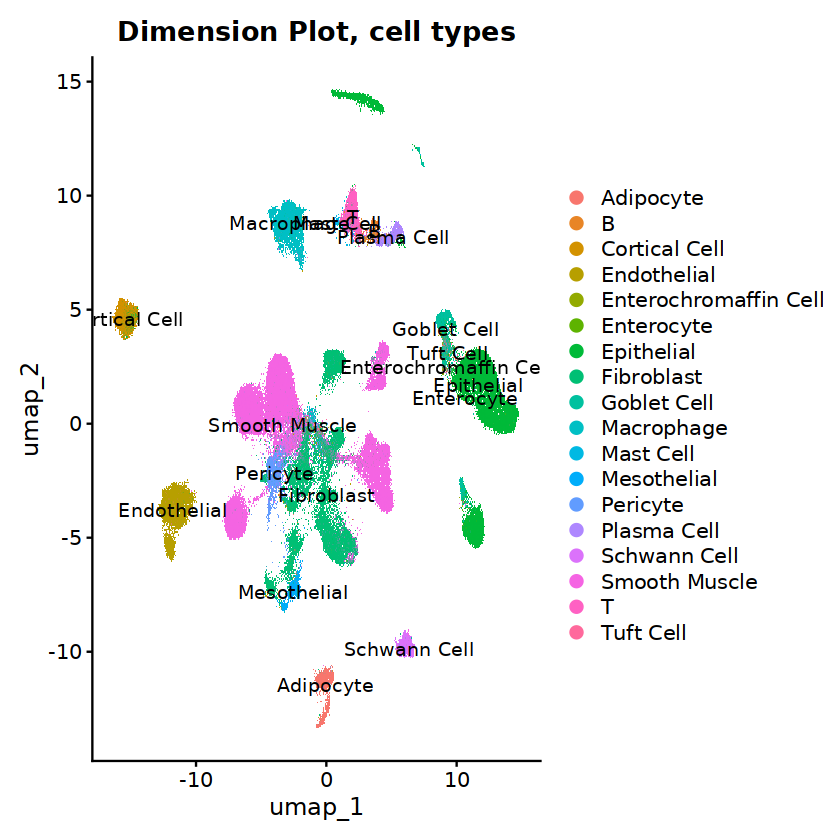

In [67]:
#Plot dim plot with summarised and filtered cell types
p1 <- DimPlot(object = seurat_object, label = TRUE)
p2 <- DimPlot(object = seurat_object, group.by = 'id', label = TRUE) +ggtitle("Dimension Plot")

p3 <- DimPlot(object = temp, label = TRUE)
p4 <- DimPlot(object = temp, group.by = 'id', label = TRUE)+ ggtitle("Dimension Plot, cell types")
p1
p2
p3
p4

In [58]:
ggsave(p1, 
       filename = "report/dimplot_summarised_legend.pdf",
       device = "pdf",
       height = 6, width = 20, units = "in") 
ggsave(p2, 
       filename = "report/dimplot_summarised_label.pdf",
       device = "pdf",
       height = 6, width = 13, units = "in") 
ggsave(p3, 
       filename = "report/dimplot_summarised_legend_red.pdf",
       device = "pdf",
       height = 6, width = 20, units = "in") 
ggsave(p4, 
       filename = "report/dimplot_summarised_label_red.pdf",
       device = "pdf",
       height = 6, width = 13, units = "in") 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [ ]:
for (i in seq(1,19)){

ct <- unique(temp$id)[i]
st <- subset( x = temp, subset = id == ct)
ct
p1 <- DimPlot(object = st) + NoLegend() + ggtitle(ct)

    
print(p1)
    
}

In [155]:
#Make dataframe with clusters as rows and cell types as columnes
cols = sort(unique(temp$id))
rows = sort(unique(temp$seurat_clusters))
meta <- as.data.frame(temp[[]])
df <- data.frame(row.names = rows)

#Count how many cells per cell types there are in each cluster
for (r in rows){
    for (l in seq(1,length(cols))){
        m <- dplyr::filter(meta, id == cols[l])
        m <- dplyr::filter(m, seurat_clusters == r)
        df[as.numeric(r)+1, l] <- length(m$id)        
    }  
}

colnames(df) <- cols

#Add the toal number of cells per cluster
df$total <- rowSums(df)



In [157]:
#Calculate purrity of each cluster
df$purrity <- 0
for (r in rows){
    df[r,20] <- max(df[-19][r,])/df[r,19]
}

#Add predominant cell typ of cluster to df
df$cluster_celltype <- colnames(df[-19])[max.col(df[-19],ties.method="first")]
#Add cluster as columne
df$cluster <- rows



In [159]:
df[c(19,20,21)]

,total,purrity,cluster_celltype
,<dbl>,<dbl>,<chr>
0,9321,0.9796159,Smooth Muscle
1,8521,0.9908461,Smooth Muscle
2,8289,0.4834118,Fibroblast
3,8044,0.9879413,Epithelial
4,7331,0.9904515,Smooth Muscle
5,6335,0.9381215,Fibroblast
6,5889,0.9791136,Macrophage
7,5719,0.9861864,Endothelial
8,5059,0.9958490,Smooth Muscle


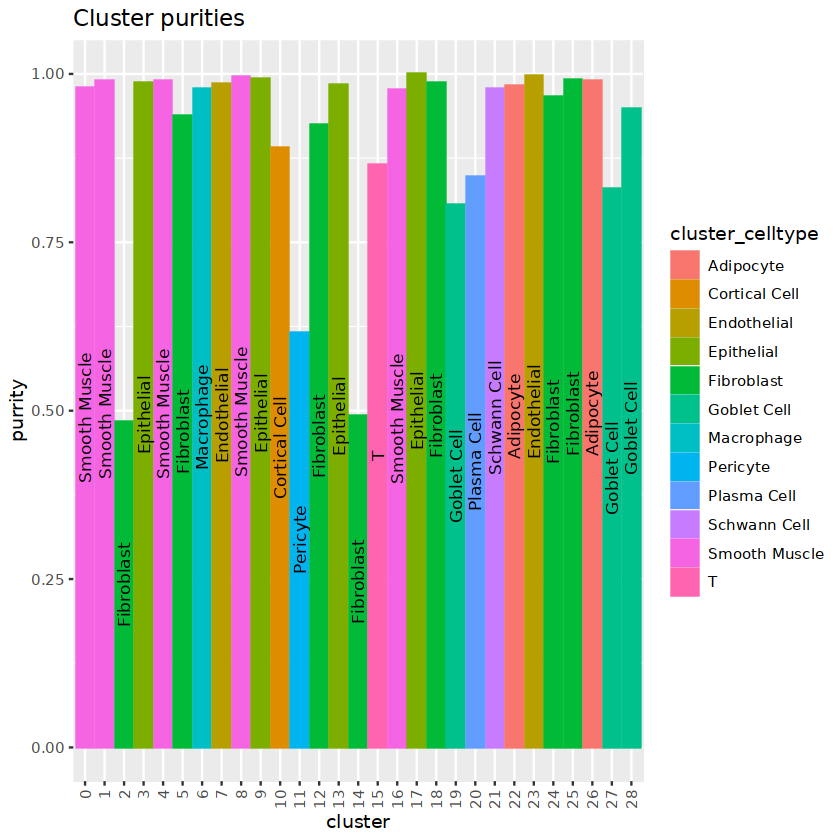

In [167]:
ggplot(df, aes(x= cluster, y = purrity, color = cluster_celltype, fill = cluster_celltype))+
geom_bar(stat="identity")+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
ggtitle("Cluster purities")+
geom_text(aes(label=cluster_celltype), position = position_stack(vjust = 0.5), angle = 90, color="black", size=3.5)


In [ ]:
#####################################
#DA peaks
#####################################
seurat_object <- qread("report/GSE184462_merged_1_20_processed.rds")

In [268]:
# change back to working with peaks instead of gene activities
DefaultAssay(seurat_object) <- 'peaks'
Idents(seurat_object) <- seurat_object$id
ident <- unique(Idents(seurat_object))

da_peaks <- FindMarkers(
  object = seurat_object,
  ident.1 = "Endothelial", #"Mesothelial Cell",
  ident.2 = "Adipocyte", #rest,
  test.use = 'LR',
  latent.vars = 'nCount_peaks'
)
head(da_peaks)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrM-15-3833,0.000000e+00,1.150606,0.987,0.945,0.000000e+00
chrM-13338-16499,0.000000e+00,1.207012,0.988,0.937,0.000000e+00
chr1-15798858-15800720,9.175024e-135,-3.902688,0.010,0.161,3.144739e-129
chr14-38254970-38256678,1.560288e-131,4.855902,0.137,0.005,5.347887e-126
chr4-182142507-182145298,2.807237e-126,-4.072882,0.008,0.145,9.621803e-121
chr18-12257782-12259351,4.885123e-126,-7.861635,0.000,0.101,1.674376e-120


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



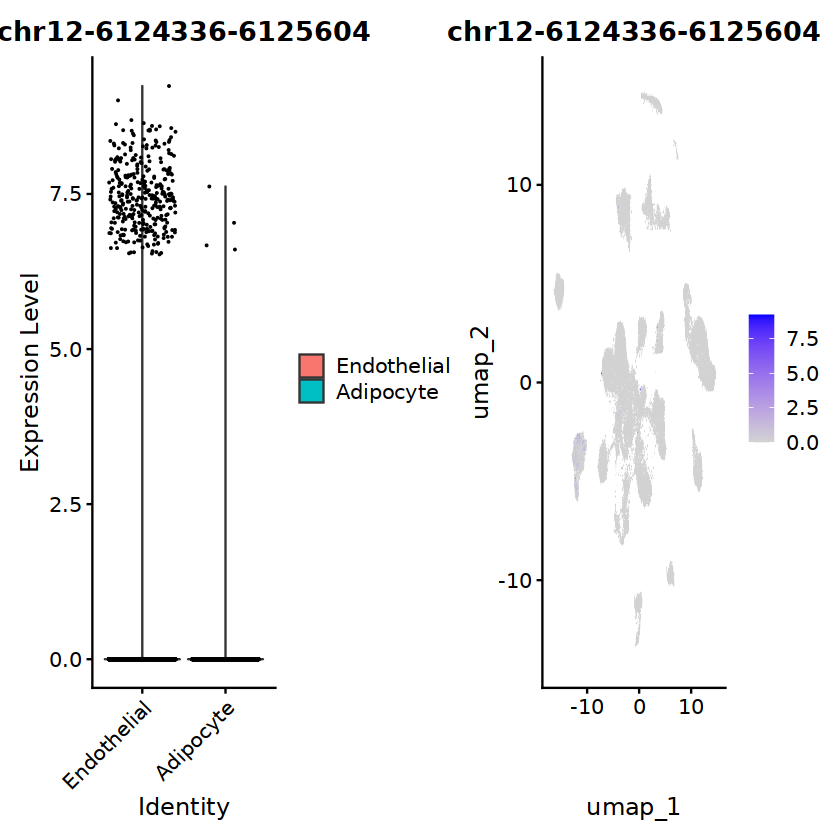

In [267]:
plot1 <- VlnPlot(
  object = seurat_object,
  features = "chr12-6124336-6125604",
  pt.size = 0.05,
  idents = c("Endothelial", "Adipocyte")
)
plot2 <- FeaturePlot(
  object = seurat_object,
  features = "chr12-6124336-6125604",
  pt.size = 1.3
)

plot1 | plot2

In [270]:
# change back to working with peaks instead of gene activities
DefaultAssay(seurat_object) <- 'RNA'
Idents(seurat_object) <- seurat_object$id
ident <- unique(Idents(seurat_object))

da_peaks <- FindMarkers(
  object = seurat_object,
  ident.1 = "Endothelial", #"Mesothelial Cell",
  ident.2 = "Adipocyte", #rest,
  test.use = 'LR',
  latent.vars = 'nCount_peaks'
)
head(da_peaks)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ADCY5,0.000000e+00,-1.841402,0.155,0.656,0.000000e+00
ACACB,0.000000e+00,-1.918620,0.350,0.795,0.000000e+00
ACSL1,0.000000e+00,-2.122807,0.115,0.630,0.000000e+00
PLIN4,0.000000e+00,-2.705478,0.051,0.619,0.000000e+00
TLN2,0.000000e+00,-1.528640,0.329,0.798,0.000000e+00
LRP1,2.032907e-317,-1.719152,0.143,0.615,3.985921e-313


In [273]:
#Filter for peaks more active in ident1, statistical significance and activity over 50%
da_peaks <- filter(da_peaks, pct.1 > pct.2)
da_peaks <- filter(da_peaks, pct.1 > 0.5)
da_peaks <- filter(da_peaks, p_val_adj < 0.05)
da_peaks

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
VWF,1.757204e-285,1.8866261,0.551,0.231,3.445350e-281
MCF2L,7.826291e-235,1.6282753,0.550,0.281,1.534501e-230
DOCK9,1.094308e-231,1.5147681,0.585,0.324,2.145610e-227
PECAM1,1.622862e-218,1.5783879,0.511,0.265,3.181945e-214
PLEKHG1,8.180937e-216,1.5347967,0.527,0.251,1.604036e-211
SEC14L1,2.173353e-191,1.4554599,0.516,0.294,4.261292e-187
MYH9,2.128781e-190,1.3103074,0.601,0.399,4.173901e-186
RPS6KA2,2.357082e-169,1.1289012,0.667,0.492,4.621531e-165
GRK5,1.813791e-161,1.1648958,0.595,0.423,3.556299e-157


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



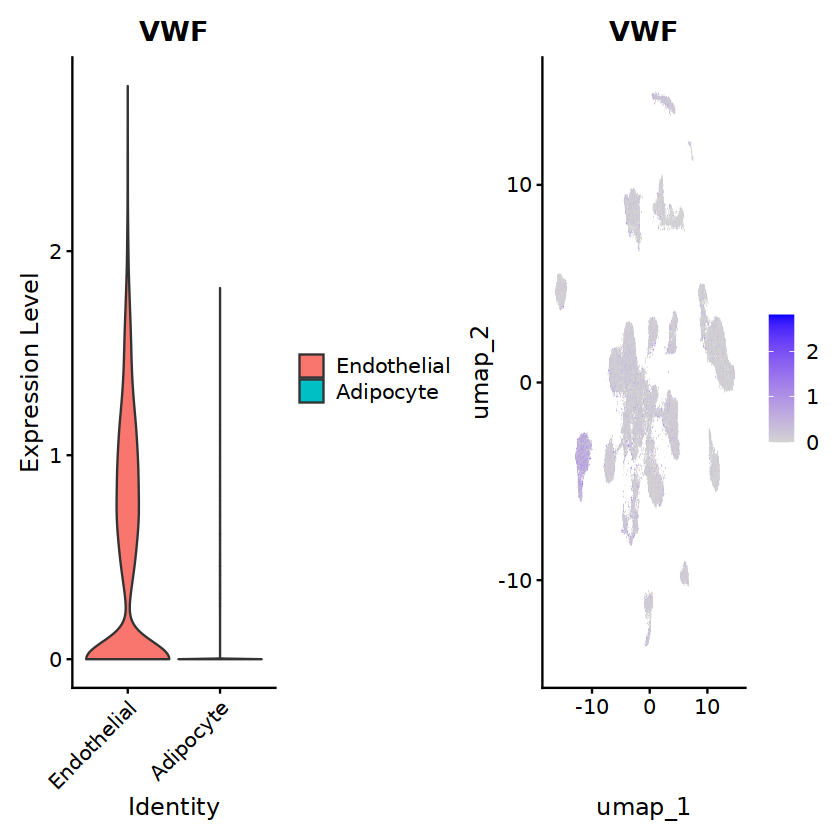

In [275]:
plot1 <- VlnPlot(
  object = seurat_object,
  features = rownames(da_peaks)[1],
  pt.size = 0,
  idents = c("Endothelial", "Adipocyte")
)
plot2 <- FeaturePlot(
  object = seurat_object,
  features = rownames(da_peaks)[1],
  pt.size = 1.3
)

plot1 | plot2

In [277]:
ggsave(plot1, 
       filename = "report/Violin_plot_Endo_Adipo.pdf",
       device = "pdf",
       height = 10, width = 10, units = "in") 

ggsave(plot2, 
       filename = "report/Feature_plot_Endo_Adipo.pdf",
       device = "pdf",
       height = 10, width = 10, units = "in") 

In [189]:
#####################################
#CRE
#####################################

In [240]:
links <- Links(seurat_object)
keep <- !is.na(mcols(links)$group)
links <- links[keep,]
links <- plyranges::filter(links, score > 0.22)
seurat_test <- seurat_object
Links(seurat_test) <- links


Warning message:
"Removed 129 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 59 rows containing missing values (`geom_segment()`)."


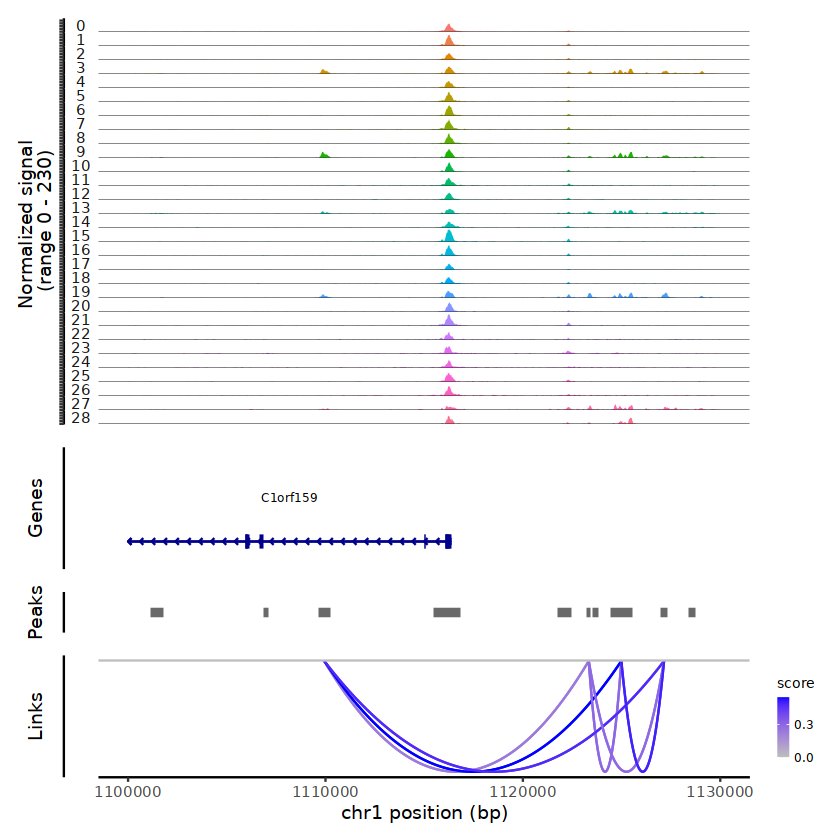

Warning message:
"Removed 129 rows containing missing values (`geom_segment()`)."


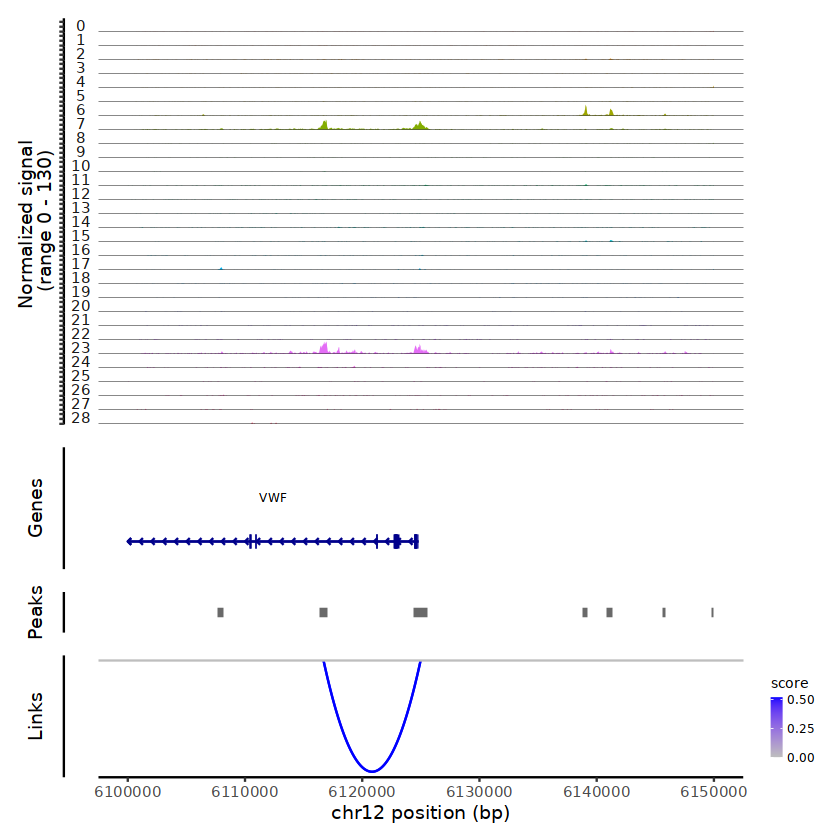

Warning message:
"Removed 59 rows containing missing values (`geom_segment()`)."


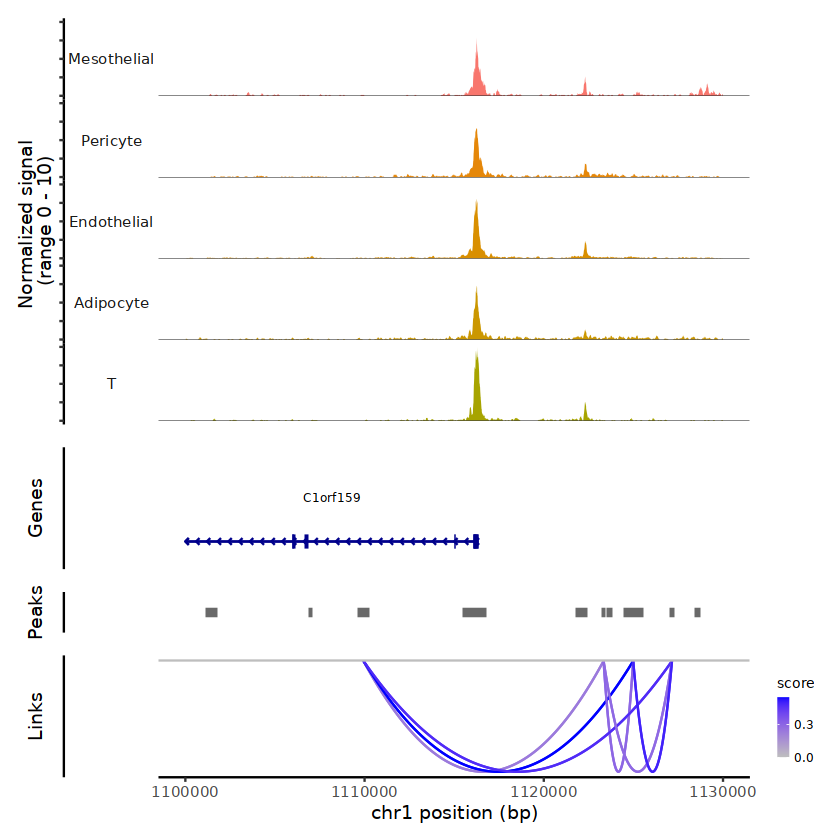

Warning message:
"Removed 129 rows containing missing values (`geom_segment()`)."


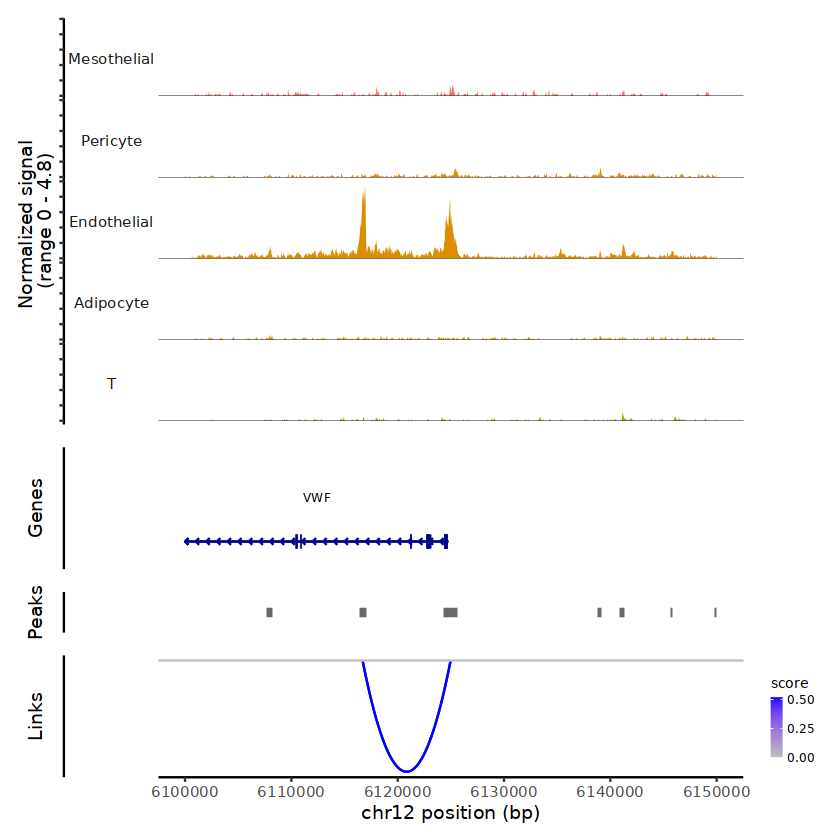

Warning message:
"Removed 59 rows containing missing values (`geom_segment()`)."


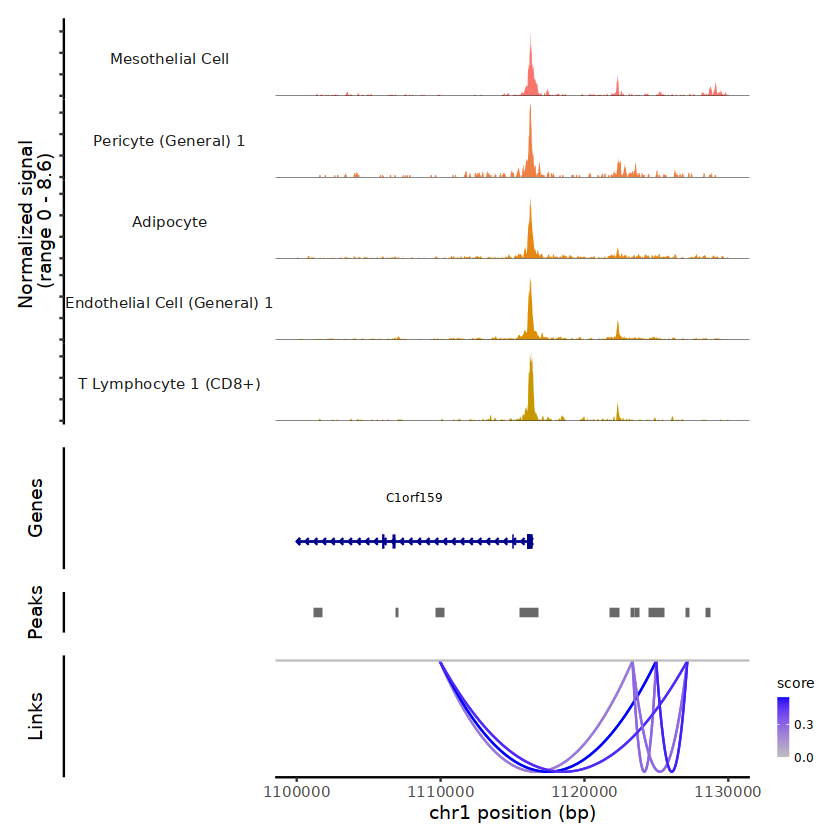

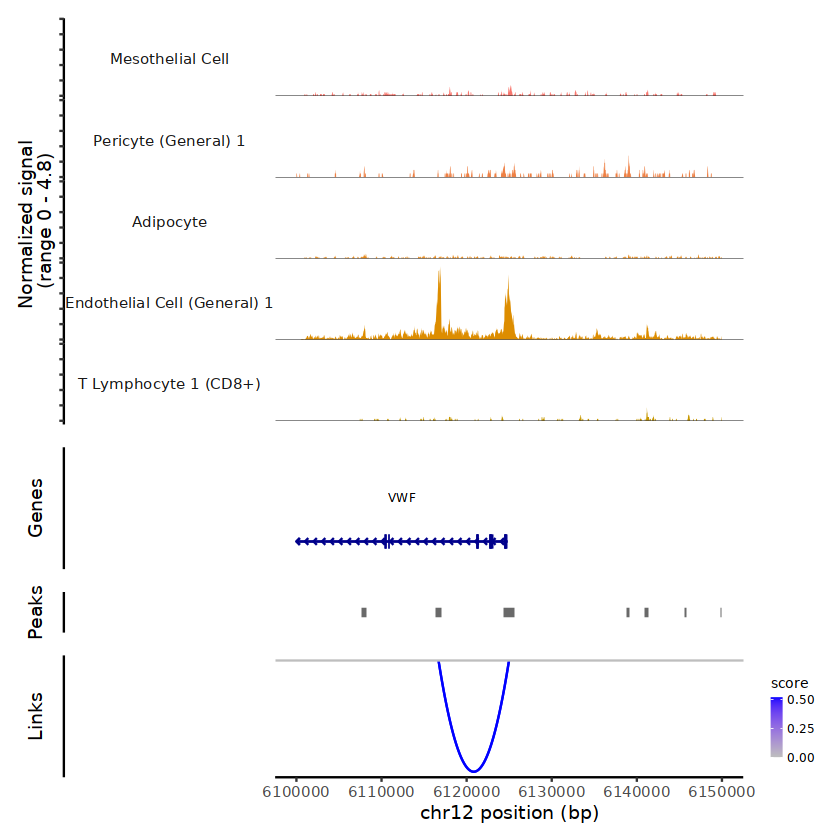

In [243]:
Idents(seurat_test) <- seurat_test$seurat_clusters
CoveragePlot(seurat_test, region = "chr1-1100000-1130000") + ggtitle("Coverage Plot C1orf159")
CoveragePlot(seurat_test, region = "chr12-6100000-6150000") + ggtitle("Coverage Plot VWF")

Idents(seurat_test) <- seurat_test$id
CoveragePlot(seurat_test, region = "chr1-1100000-1130000",
            idents = c("Mesothelial", "Endothelial", "Pericyte", "Adipocyte", "T")) + ggtitle("Coverage Plot C1orf159")
CoveragePlot(seurat_test, region = "chr12-6100000-6150000",
            idents = c("Mesothelial", "Endothelial", "Pericyte", "Adipocyte", "T")) + ggtitle("Coverage Plot VWF")

Idents(seurat_test) <- seurat_test$cell.type
CoveragePlot(seurat_test, region = "chr1-1100000-1130000",
            idents = c("Mesothelial Cell", "Endothelial Cell (General) 1", "Pericyte (General) 1", "Adipocyte", "T Lymphocyte 1 (CD8+)"))+ ggtitle("Coverage Plot C1orf159")
CoveragePlot(seurat_test, region = "chr12-6100000-6150000",
            idents = c("Mesothelial Cell", "Endothelial Cell (General) 1", "Pericyte (General) 1", "Adipocyte", "T Lymphocyte 1 (CD8+)")) + ggtitle("Coverage Plot VWF")

In [287]:
##########################3
#motif & heatmap
#############################3
seurat_object <- qread("report/GSE184462_merged_1_20_Motif.rds")

In [290]:
id <- seurat_object$cell.type
id <- as.data.frame(id)
#Assing summariesed id's
id[id =="Adipocyte"] <- "Adipocyte"
id[id =="Alveolar Capillary Endothelial Cell"] <- "Endothelial"
id[id =="Alveolar Type 2 (AT2) Cell"] <- "Alveolar"
id[id =="Alverolar Type 2,Immune"] <- "Alveolar"
id[id =="Cardiac Fibroblasts"] <- "Fibroblast"
id[id =="Cardiac Pericyte 1"] <- "Pericyte"
id[id =="Cardiac Pericyte 2"] <- "Pericyte"
id[id =="Cardiac Pericyte 3"] <- "Pericyte"
id[id =="Cardiac Pericyte 4"] <- "Pericyte"
id[id =="Chief Cell"] <- "Chief Cell"
id[id =="CNS,Enteric Neuron"] <- "Neuron"
id[id =="Cortical Epithelial-like"] <- "Epithelial"
id[id =="Ductal Cell (Pancreatic)"] <- "Ductal Cell"
id[id =="Endocardial Cell"] <- "Endocardial"
id[id =="Endothelial (Exocrine Tissues)"] <- "Endothelial"
id[id =="Endothelial Cell (General) 1"] <- "Endothelial"
id[id =="Endothelial Cell (General) 2"] <- "Endothelial"
id[id =="Endothelial Cell (General) 3"] <- "Endothelial"
id[id =="Endothelial Cell (Myocardial)"] <- "Endothelial"
id[id =="Fibroblast (Epithelial)"] <- "Fibroblast"
id[id =="Fibroblast (General)"] <- "Fibroblast"
id[id =="Fibroblast (Liver Adrenal)"] <- "Fibroblast"
id[id =="Fibroblast (Peripheral Nerve)"] <- "Fibroblast"
id[id =="Foveolar Cell"] <- "Foveolar Cell"
id[id =="Keratinocyte 1"] <- "Keratinocyte"
id[id =="Luteal Cell (Ovarian)"] <- "Luteal Cell"
id[id =="Lymphatic Endothelial Cell"] <- "Endothelial"
id[id =="Macrophage (General,Alveolar)"] <- "Macrophage"
id[id =="Macrophage (General)"] <- "Macrophage"
id[id =="Mast Cell"] <- "Mast Cell"
id[id =="Memory B Cell"] <- "B"
id[id =="Mesothelial Cell"] <- "Mesothelial"
id[id =="Naive T cell"] <- "T"
id[id =="Natural Killer T Cell"] <- "T"
id[id =="Pancreatic Acinar Cell"] <- "Acinar Cell"
id[id =="Pericyte (Esophageal Muscularis)"] <- "Pericyte"
id[id =="Pericyte (General) 1"] <- "Pericyte"
id[id =="Pericyte (General) 2"] <- "Pericyte"
id[id =="Pericyte (General) 3"] <- "Pericyte"
id[id =="Pericyte (General) 4"] <- "Pericyte"
id[id =="Peripheral Nerve Stromal"] <- "Neuron"
id[id =="Plasma Cell"] <- "Plasma Cell"
id[id =="Schwann Cell (General)"] <- "Schwann Cell"
id[id =="Small Intestinal Enterocyte"] <- "Enterocyte"
id[id =="Smooth Muscle (Esophageal Muscularis) 3"] <- "Smooth Muscle"
id[id =="Smooth Muscle (GE Junction)"] <- "Smooth Muscle"
id[id =="Smooth Muscle (General)"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Vaginal)"] <- "Smooth Muscle"
id[id =="T Lymphocyte 1 (CD8+)"] <- "T"
id[id =="T lymphocyte 2 (CD4+)"] <- "T"
id[id =="Transitional Zone Cortical Cell"] <- "Cortical Cell"
id[id =="Vascular Smooth Muscle 1"] <- "Smooth Muscle"
id[id =="Vascular Smooth Muscle 2"] <- "Smooth Muscle"
id[id =="Zona Fasciculata Cortical Cell"] <- "Cortical Cell"
id[id =="Zona Glomerulosa Cortical Cell"] <- "Cortical Cell"

#Additional Cellt types (11-20)
id[id =="Airway Goblet Cell"] <- "Goblet Cell"
id[id =="Astrocyte 2"] <- "Astrocyte"
id[id =="Basal Epidermal (Skin)"] <- "Epidermal"
id[id =="Basal Epithelial (Mammary)"] <- "Epithelial"
id[id =="Blood Brain Barrier Endothelial Cell"] <- "Endothelial"
id[id =="Club Cell"] <- "Club Cell"
id[id =="Colon Epithelial Cell 1"] <- "Epithelial"
id[id =="Colon Epithelial Cell 2"] <- "Epithelial"
id[id =="Colon Epithelial Cell 3"] <- "Epithelial"
id[id =="Colonic Goblet Cell"] <- "Goblet Cell"
id[id =="Enterochromaffin Cell"] <- "Enterochromaffin Cell"
id[id =="Esophageal Epithelial Cell"] <- "Epithelial"
id[id =="Fibroblast (Gastrointestinal)"] <- "Fibroblast"
id[id =="Fibroblast (Sk Muscle Associated)"] <- "Fibroblast"
id[id =="GABAergic Neuron 1"] <- "Neuron"
id[id =="Gastric Neuroendocrine Cell"] <- "Neuron"
id[id =="Granular Epidermal (Skin)"] <- "Epidermal"
id[id =="Mammary Luminal Epithelial Cell 2"] <- "Epithelial"
id[id =="Melanocyte"] <- "Melanocyte"
id[id =="Myoepithelial (Skin)"] <- "Myoepithelial"
id[id =="Oligodendrocyte"] <- "Oligodendrocyte"
id[id =="Oligodendrocyte Precursor"] <- "Oligodendrocyte"
id[id =="Paneth Cell"] <- "Paneth Cell"
id[id =="Small Intestinal Goblet Cell"] <- "Adipocyte"
id[id =="Smooth Muscle (Colon) 1"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Colon) 2"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Esophageal Mucosal)"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Esophageal Muscularis) 1"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Esophageal Muscularis) 2"] <- "Smooth Muscle"
id[id =="Smooth Muscle (General Gastrointestinal)"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Uterine)"] <- "Smooth Muscle"
id[id =="Tuft Cell"] <- "Tuft Cell"


seurat_object$id <- id

In [345]:
#Create data frame for each summarised id and how many cells they contain
id <- unique(seurat_object$id)
df <- data.frame(row.names = id)
meta <- as.data.frame(seurat_object[[]])
t <- 1


for (i in id){
    temp <- filter(meta, id == i)
    df[i,1] <- length(temp$id)
    
}

colnames(df) <- c("cell_count")

#Filter for cell types (id) with more than 100 cells
filter_id = rownames(filter(df, cell_count > 100 ))

temp <- subset(seurat_object, id %in% filter_id)

Idents(temp) <- seurat_object$id 
DefaultAssay(temp) <- 'chromvar'
ident <- unique(temp$id)
df <- NULL
df <- data.frame(row.names = ident)

for (i in ident){
differential.activity <- FindMarkers(
  object = temp,
  ident.1 = i,
  only.pos = TRUE,
  mean.fxn = rowMeans,
  fc.name = "avg_diff"
)

    
df[t,1] <- rownames(differential.activity)[1]
df[t,2] <- rownames(differential.activity)[2]
df[t,3] <- rownames(differential.activity)[3]
df[t,4] <- rownames(differential.activity)[4]
df[t,5] <- rownames(differential.activity)[5]
t <- t + 1
   
if (FALSE){
mp <- MotifPlot(
  object = seurat_object,
  motifs = head(rownames(differential.activity)),
  assay = 'peaks'
)

path <- paste("report/motif_plot", i, ".pdf", sep = "")
ggsave(mp, 
       filename = path,
       device = "pdf",
       height = 6, width = 8, units = "in") 
    
}
} 

[1] "Mesothelial"
[1] "Fibroblast"
[1] "Pericyte"
[1] "Endothelial"
[1] "Adipocyte"
[1] "Macrophage"
[1] "T"
[1] "Smooth Muscle"
[1] "Mast Cell"
[1] "Plasma Cell"
[1] "Schwann Cell"
[1] "B"
[1] "Enterocyte"
[1] "Cortical Cell"
[1] "Epithelial"
[1] "Goblet Cell"
[1] "Enterochromaffin Cell"
[1] "Tuft Cell"


In [428]:
df

,V1,V2,V3,V4,V5
,<chr>,<chr>,<chr>,<chr>,<chr>
Mesothelial,MA0476.1,MA0478.1,MA0489.1,MA0655.1,MA0841.1
Fibroblast,MA1618.1,MA0102.4,MA0836.2,MA0043.3,MA0025.2
Pericyte,MA0113.3,MA1123.2,MA0727.1,MA0836.2,MA1636.1
Endothelial,MA1636.1,MA1624.1,MA0519.1,MA0137.3,MA0144.2
Adipocyte,MA0518.1,MA0519.1,MA0137.3,MA0144.2,MA0466.2
Macrophage,MA1636.1,MA0102.4,MA0836.2,MA1128.1,MA1141.1
T,MA1508.1,MA1513.1,MA0136.2,MA1115.1,MA0640.2
Smooth Muscle,MA0057.1,MA0092.1,MA0139.1,MA0152.1,MA0488.1
Mast Cell,MA0502.2,MA1623.1,MA0113.3,MA0050.2,MA0091.1


In [429]:
hp_featurs <- NULL
for (r in seq(1, nrow(df))){
    hp_featurs <- append(hp_featurs, df[r,1])
    hp_featurs <- append(hp_featurs, df[r,2])
    hp_featurs <- append(hp_featurs, df[r,3])
    hp_featurs <- append(hp_featurs, df[r,4])
    hp_featurs <- append(hp_featurs, df[r,5])    
}

In [430]:
DefaultAssay(temp) <- "chromvar"
Idents(temp) <- temp$id
hp <- DoHeatmap(
  temp,
  features = hp_featurs,
  group.by = "ident",
  slot = "data",
  size = 3,
    
  combine = TRUE
)

hp <- hp + ggtitle("Heatmap Motifs")
ggsave(hp, 
       filename = "report/HeatMap_motifs.pdf",
       device = "pdf",
       height = 10, width = 10, units = "in") 

In [ ]:
DefaultAssay(temp) <- "RNA"
df2 <- NULL
df2 <- data.frame(row.names = ident)
t <- 1

for (i in ident){
differential.activity <- FindMarkers(
  object = temp,
  ident.1 = i,
  only.pos = TRUE,
  mean.fxn = rowMeans,
  fc.name = "avg_diff"
)

    
df2[t,1] <- rownames(differential.activity)[1]
df2[t,2] <- rownames(differential.activity)[2]
df2[t,3] <- rownames(differential.activity)[3]
df2[t,4] <- rownames(differential.activity)[4]
df2[t,5] <- rownames(differential.activity)[5]
t <- t + 1
    
}

In [395]:
df2

,V1,V2,V3,V4,V5
,<chr>,<chr>,<chr>,<chr>,<chr>
Mesothelial,GALNT9,WWC1,GFPT2,DAPK1,ROR2
Fibroblast,KCNN3,NAV1,NID1,TNXB,LRP1
Pericyte,NFASC,DAAM2,ADCY3,CACNA1H,CRISPLD2
Endothelial,PLEKHG1,RPS6KA2,ADAMTS9,SLCO2A1,ANO2
Adipocyte,LAMA4,PPARG,ACACB,TMEM132C,LDLRAD3
Macrophage,FRMD4B,SLCO2B1,PIK3R5,GAS7,MERTK
T,RUNX3,SMAP2,CD247,PTPRC,SCML4
Smooth Muscle,JPH2,PRDM16,ARHGEF10L,LMOD1,ADCY5
Mast Cell,IL1RL1,IL18R1,GRAP2,KIT,GATA2


In [425]:
hp_featurs <- NULL
for (r in seq(1, nrow(df))){
    hp_featurs <- append(hp_featurs, df2[r,1])
    hp_featurs <- append(hp_featurs, df2[r,2])
    hp_featurs <- append(hp_featurs, df2[r,3])
    hp_featurs <- append(hp_featurs, df2[r,4])
    hp_featurs <- append(hp_featurs, df2[r,5])    
}

In [396]:
DefaultAssay(temp) <- "RNA"
Idents(temp) <- temp$id
hp <- DoHeatmap(
  temp,
  features = hp_featurs,
  group.by = "ident",
  slot = "data",
  size = 3,
  disp.max = 2,    
  combine = TRUE
)

ggsave(hp, 
       filename = "report/HeatMap_genes.pdf",
       device = "pdf",
       height = 10, width = 10, units = "in") 

In [419]:
temp_f <- subset(temp, id == "Fibroblast")
temp_f <- subset(temp_f, cell.type %in% c("Fibroblast (Gastrointestinal)", "Fibroblast (Liver Adrenal)", "Fibroblast (General)", "Fibroblast (Peripheral Nerve)")



Fibroblast (Gastrointestinal)          Fibroblast (General) 
                         4254                         16081 
   Fibroblast (Liver Adrenal) Fibroblast (Peripheral Nerve) 
                          197                           136 

In [421]:
Idents(temp_f) <- temp_f$cell.type 
DefaultAssay(temp_f) <- 'chromvar'
ident <- unique(temp_f$cell.type)

df3 <- NULL
df3 <- data.frame(row.names = ident)
t <- 1

for (i in ident){
differential.activity <- FindMarkers(
  object = temp_f,
  ident.1 = i,
  only.pos = TRUE,
  mean.fxn = rowMeans,
  fc.name = "avg_diff"
)

    
df3[t,1] <- rownames(differential.activity)[1]
df3[t,2] <- rownames(differential.activity)[2]
df3[t,3] <- rownames(differential.activity)[3]
df3[t,4] <- rownames(differential.activity)[4]
df3[t,5] <- rownames(differential.activity)[5]
t <- t + 1
    
}

In [422]:
df3

,V1,V2,V3,V4,V5
,<chr>,<chr>,<chr>,<chr>,<chr>
Fibroblast (General),MA0476.1,MA0478.1,MA0489.1,MA0501.1,MA0655.1
Fibroblast (Peripheral Nerve),MA0493.1,MA1515.1,MA0742.1,MA1643.1,MA1511.1
Fibroblast (Liver Adrenal),MA0505.1,MA0037.3,MA1540.1,MA0036.3,MA0482.2
Fibroblast (Gastrointestinal),MA1619.1,MA1472.1,MA0698.1,MA1641.1,MA0832.1


In [423]:
hp_featurs <- NULL
for (r in seq(1, nrow(df))){
    hp_featurs <- append(hp_featurs, df3[r,1])
    hp_featurs <- append(hp_featurs, df3[r,2])
    hp_featurs <- append(hp_featurs, df3[r,3])
    hp_featurs <- append(hp_featurs, df3[r,4])
    hp_featurs <- append(hp_featurs, df3[r,5])    
}

DefaultAssay(temp_f) <- "chromvar"
Idents(temp_f) <- temp_f$cell.type
hp <- DoHeatmap(
  temp_f,
  features = hp_featurs,
  group.by = "ident",
  slot = "data",
  size = 3,    
  combine = TRUE
)

ggsave(hp, 
       filename = "report/HeatMap_motifs_fibro.pdf",
       device = "pdf",
       height = 10, width = 10, units = "in") 

Warning message in DoHeatmap(temp_f, features = hp_featurs, group.by = "ident", :
"The following features were omitted as they were not found in the data slot for the chromvar assay: NA"


In [460]:
fp <- FeaturePlot(
  object = temp,
  features = "MA0071.1",
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.5
)

ggsave(fp, 
       filename = "report/Featureplot_MA0071.1.pdf",
       device = "pdf",
       height = 10, width = 10, units = "in")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [ ]:
###################################
#Do a heat map
###################################
seurat_object <- qread("report/GSE184462_merged_1_20_Motif.rds")

id <- seurat_object$cell.type
id <- as.data.frame(id)
#Assing summariesed id's
id[id =="Adipocyte"] <- "Adipocyte"
id[id =="Alveolar Capillary Endothelial Cell"] <- "Endothelial"
id[id =="Alveolar Type 2 (AT2) Cell"] <- "Alveolar"
id[id =="Alverolar Type 2,Immune"] <- "Alveolar"
id[id =="Cardiac Fibroblasts"] <- "Fibroblast"
id[id =="Cardiac Pericyte 1"] <- "Pericyte"
id[id =="Cardiac Pericyte 2"] <- "Pericyte"
id[id =="Cardiac Pericyte 3"] <- "Pericyte"
id[id =="Cardiac Pericyte 4"] <- "Pericyte"
id[id =="Chief Cell"] <- "Chief Cell"
id[id =="CNS,Enteric Neuron"] <- "Neuron"
id[id =="Cortical Epithelial-like"] <- "Epithelial"
id[id =="Ductal Cell (Pancreatic)"] <- "Ductal Cell"
id[id =="Endocardial Cell"] <- "Endocardial"
id[id =="Endothelial (Exocrine Tissues)"] <- "Endothelial"
id[id =="Endothelial Cell (General) 1"] <- "Endothelial"
id[id =="Endothelial Cell (General) 2"] <- "Endothelial"
id[id =="Endothelial Cell (General) 3"] <- "Endothelial"
id[id =="Endothelial Cell (Myocardial)"] <- "Endothelial"
id[id =="Fibroblast (Epithelial)"] <- "Fibroblast"
id[id =="Fibroblast (General)"] <- "Fibroblast"
id[id =="Fibroblast (Liver Adrenal)"] <- "Fibroblast"
id[id =="Fibroblast (Peripheral Nerve)"] <- "Fibroblast"
id[id =="Foveolar Cell"] <- "Foveolar Cell"
id[id =="Keratinocyte 1"] <- "Keratinocyte"
id[id =="Luteal Cell (Ovarian)"] <- "Luteal Cell"
id[id =="Lymphatic Endothelial Cell"] <- "Endothelial"
id[id =="Macrophage (General,Alveolar)"] <- "Macrophage"
id[id =="Macrophage (General)"] <- "Macrophage"
id[id =="Mast Cell"] <- "Mast Cell"
id[id =="Memory B Cell"] <- "B"
id[id =="Mesothelial Cell"] <- "Mesothelial"
id[id =="Naive T cell"] <- "T"
id[id =="Natural Killer T Cell"] <- "T"
id[id =="Pancreatic Acinar Cell"] <- "Acinar Cell"
id[id =="Pericyte (Esophageal Muscularis)"] <- "Pericyte"
id[id =="Pericyte (General) 1"] <- "Pericyte"
id[id =="Pericyte (General) 2"] <- "Pericyte"
id[id =="Pericyte (General) 3"] <- "Pericyte"
id[id =="Pericyte (General) 4"] <- "Pericyte"
id[id =="Peripheral Nerve Stromal"] <- "Neuron"
id[id =="Plasma Cell"] <- "Plasma Cell"
id[id =="Schwann Cell (General)"] <- "Schwann Cell"
id[id =="Small Intestinal Enterocyte"] <- "Enterocyte"
id[id =="Smooth Muscle (Esophageal Muscularis) 3"] <- "Smooth Muscle"
id[id =="Smooth Muscle (GE Junction)"] <- "Smooth Muscle"
id[id =="Smooth Muscle (General)"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Vaginal)"] <- "Smooth Muscle"
id[id =="T Lymphocyte 1 (CD8+)"] <- "T"
id[id =="T lymphocyte 2 (CD4+)"] <- "T"
id[id =="Transitional Zone Cortical Cell"] <- "Cortical Cell"
id[id =="Vascular Smooth Muscle 1"] <- "Smooth Muscle"
id[id =="Vascular Smooth Muscle 2"] <- "Smooth Muscle"
id[id =="Zona Fasciculata Cortical Cell"] <- "Cortical Cell"
id[id =="Zona Glomerulosa Cortical Cell"] <- "Cortical Cell"

#Additional Cellt types (11-20)
id[id =="Airway Goblet Cell"] <- "Goblet Cell"
id[id =="Astrocyte 2"] <- "Astrocyte"
id[id =="Basal Epidermal (Skin)"] <- "Epidermal"
id[id =="Basal Epithelial (Mammary)"] <- "Epithelial"
id[id =="Blood Brain Barrier Endothelial Cell"] <- "Endothelial"
id[id =="Club Cell"] <- "Club Cell"
id[id =="Colon Epithelial Cell 1"] <- "Epithelial"
id[id =="Colon Epithelial Cell 2"] <- "Epithelial"
id[id =="Colon Epithelial Cell 3"] <- "Epithelial"
id[id =="Colonic Goblet Cell"] <- "Goblet Cell"
id[id =="Enterochromaffin Cell"] <- "Enterochromaffin Cell"
id[id =="Esophageal Epithelial Cell"] <- "Epithelial"
id[id =="Fibroblast (Gastrointestinal)"] <- "Fibroblast"
id[id =="Fibroblast (Sk Muscle Associated)"] <- "Fibroblast"
id[id =="GABAergic Neuron 1"] <- "Neuron"
id[id =="Gastric Neuroendocrine Cell"] <- "Neuron"
id[id =="Granular Epidermal (Skin)"] <- "Epidermal"
id[id =="Mammary Luminal Epithelial Cell 2"] <- "Epithelial"
id[id =="Melanocyte"] <- "Melanocyte"
id[id =="Myoepithelial (Skin)"] <- "Myoepithelial"
id[id =="Oligodendrocyte"] <- "Oligodendrocyte"
id[id =="Oligodendrocyte Precursor"] <- "Oligodendrocyte"
id[id =="Paneth Cell"] <- "Paneth Cell"
id[id =="Small Intestinal Goblet Cell"] <- "Adipocyte"
id[id =="Smooth Muscle (Colon) 1"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Colon) 2"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Esophageal Mucosal)"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Esophageal Muscularis) 1"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Esophageal Muscularis) 2"] <- "Smooth Muscle"
id[id =="Smooth Muscle (General Gastrointestinal)"] <- "Smooth Muscle"
id[id =="Smooth Muscle (Uterine)"] <- "Smooth Muscle"
id[id =="Tuft Cell"] <- "Tuft Cell"


seurat_object$id <- id

Idents(seurat_object) <- seurat_object$id
id <- Idents(seurat_object)

d <- unique(seurat_object$id)
df <- data.frame(row.names = id)
meta <- as.data.frame(seurat_object[[]])
df <- data.frame(row.names = ident)
t <- 1


for (i in id){
    temp <- filter(meta, id == i)
    df[i,1] <- length(temp$id)
    
}

colnames(df) <- c("cell_count")

#Filter for cell types (id) with more than 100 cells
filter_id = rownames(filter(df, cell_count > 100 ))

temp <- subset(seurat_object, id %in% filter_id)
Idents(temp) <- temp$id

In [451]:
# gather the footprinting information for sets of motifs
DefaultAssay(temp) <- "peaks"
seurat_object <- Footprint(
  object = temp,
  motif.name = c("RORA"),
  genome = BSgenome.Hsapiens.UCSC.hg38
)

Computing observed Tn5 insertions per base

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr1_GL383518v1_alt, chr1_GL383519v1_alt, chr1_GL383520v2_alt, chr1_KI270759v1_alt, chr1_KI270760v1_alt, chr1_KI270761v1_alt, chr1_KI270762v1_alt, chr1_KI270763v1_alt, chr1_KI270764v1_alt, chr1_KI270765v1_alt, chr1_KI270766v1_alt, chr1_KI270892v1_alt, chr2_GL383521v1_alt, chr2_GL383522v1_alt, chr2_GL582966v2_alt, chr2_KI270767v1_alt, chr2_KI270768v1_alt, chr2_KI270769v1_alt, chr2_KI270770v1_alt, chr2_KI270771v1_alt, chr2_KI270772v1_alt, chr2_KI270773v1_alt, chr2_KI270774v1_alt, chr2_KI270775v1_alt, chr2_KI270776v1_alt, chr2_KI270893v1_alt, chr2_KI270894v1_alt, chr3_GL383526v1_alt, chr3_JH636055v2_alt, chr3_KI270777v1_alt, chr3_KI270778v1_alt, chr3_KI270779v1_alt, chr3_KI270780v1_alt, chr3_KI270781v1_alt, chr3_KI270782v1_alt, chr3_KI270783v1_alt, chr3_KI270784v1_alt, chr3_KI270895v1_alt, chr3_KI270924v1_alt, ch

In [ ]:
Idents(seurat_object) <- seurat_object$id
# plot the footprint data for each group of cells
fp <- PlotFootprint(seurat_object, features = c("RORA"), label = FALSE,
                    idents = c("Mesothelial", "Fibroblast", "Endothelial", "T", "Cortical Cell" ))


ggsave(fp, 
       filename = "report/TF_Footprint_RORA.pdf",
       device = "pdf",
       height = 5, width = 10, units = "in")